# Analysis for the proportion of Education Level of different Job Types by Age groups

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data_df = pd.read_csv('/Users/tinglu/Desktop/stack-overflow-survey/final_data.csv')
data_df.head()

,Age,EdLevel,YearsCodePro,DevType,CompanySize,Salary_USD
0,18-35 years old,Master,2,DS/MLE,Small(1-99),42480.0
1,18-35 years old,Bachelor,5,DS/MLE,Large(>1000),130000.0
2,18-35 years old,Master,2,DE/DA/BA,Large(>1000),28320.0
3,>35 years old,Doctoral(PhD),8,DS/MLE,Medium(100-999),158000.0
4,18-35 years old,Doctoral(PhD),1,DS/MLE,Small(1-99),100000.0


In [6]:
data_df['EdLevel'].value_counts()

Master           3260
Bachelor         3187
Doctoral(PhD)     771
Name: EdLevel, dtype: int64

In [7]:
data_df['DevType'].value_counts()

DE/DA/BA    3908
DS/MLE      3310
Name: DevType, dtype: int64

### Show proportions by subgroups using a stacked bar chart

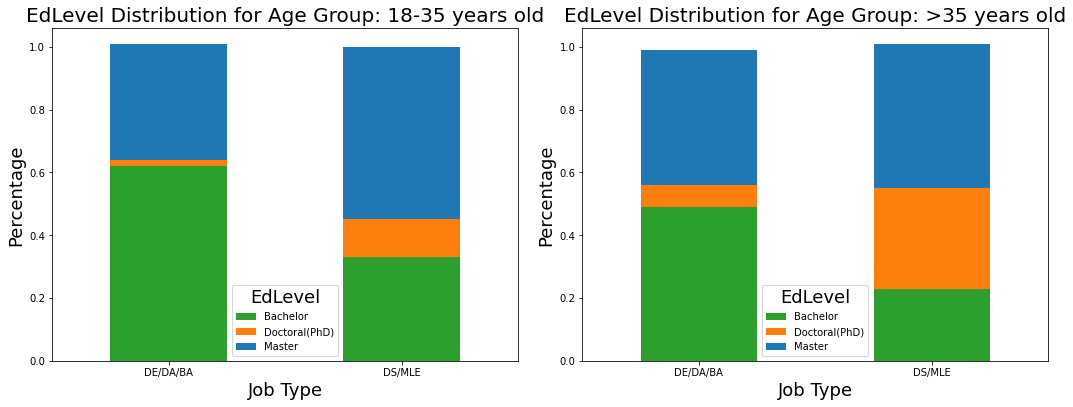

In [9]:
cross_tab = pd.crosstab(index=[data_df['DevType'], data_df['Age']], columns=data_df['EdLevel'], normalize='index').round(2)
unique_age_groups = data_df['Age'].unique()

# Increase font size
plt.rcParams['font.size'] = 18

# Define custom colors
color_palette = {'Master': '#1f77b4', 'Bachelor': '#2ca02c', 'Doctoral(PhD)': '#ff7f0e'}

# Create a custom color palette using the defined colors
custom_palette = [color_palette[edlevel] for edlevel in cross_tab.columns]

# Set the custom color palette
sns.set_palette(custom_palette)

# Plot each age group in separate subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, age_group in enumerate(unique_age_groups):
    age_group_cross_tab = cross_tab.xs(age_group, level=1)
    age_group_cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    
    axes[i].set_xlabel('Job Type')
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(f'EdLevel Distribution for Age Group: {age_group}', fontsize=20)
    axes[i].legend(title='EdLevel', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


Within the roles of Data Engineer (DE), Data Analyst (DA), and Business Analyst (BA), the majority holds bachelor’s degrees. Conversely, in Data Scientist (DS) and Machine Learning Engineer (MLE) roles, master’s degrees are predominant.

Notably, in DS and MLE positions, the prevalence of Ph.D. holders significantly surpasses that in DA, DE, and BA roles. This alignment corroborates common intuition, as doctorate-level education notably enhances individuals’ grasp of statistical and algorithmic theories.

In comparison to the age bracket below 35, the proportion of Ph.D. holders across all job categories escalates within the over-35 age group. Particularly striking is the surge in Ph.D. holders in DS and MLE positions within the over-35 category.